# **<span style="color:#0047AB; font-family: Arial, sans-serif;">OASIS INFOBYTE DATASCIENCE INTERN</span>**

## **<span style="color:#FF0000; font-family: Arial, sans-serif;">Task-5: SALES PREDICTION USING PYTHON</span>**

### **Name:** Miraj Deep Bhandari

## **<span style="color:#00A300; font-family: Arial, sans-serif;">Problem Description</span>**

The project revolves around building a machine learning model to predict future sales for a product or service-based business. The primary objective is to harness the power of machine learning techniques in order to anticipate the demand for a particular product or service. This prediction is pivotal for strategic decision-making, especially in the context of optimizing advertising expenses and resources.

## **<span style="color:#AA00FF; font-family: Arial, sans-serif;">Objective</span>**

The core objective of this project is to construct a robust machine learning model, leveraging Python, that can accurately forecast forthcoming sales.

![sales.png](https://miro.medium.com/v2/resize:fit:850/1*0uM6XZw2eC4E8yrUMmtMBQ.jpeg)


## <span style="color:#FF5733;">Importing the Dependencies</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## <span style="color:#FF5733;">Reading the CSV File</span>

In [2]:
df=pd.read_csv('Advertising.csv',usecols=['TV','Radio','Newspaper','Sales'])

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


## <span style="color:#FF5733;">Inspecting the Data Types of the Features</span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


 ## <span style="color:#FF5733;">Inspecting  descriptive statistics of Numerical Columns</span>


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## <span style="color:#FF5733;">Checking for Null Values and Duplicate Data</span>

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

## <span style="color:#FF5733;">Exploratory Data Analysis (EDA)</span>

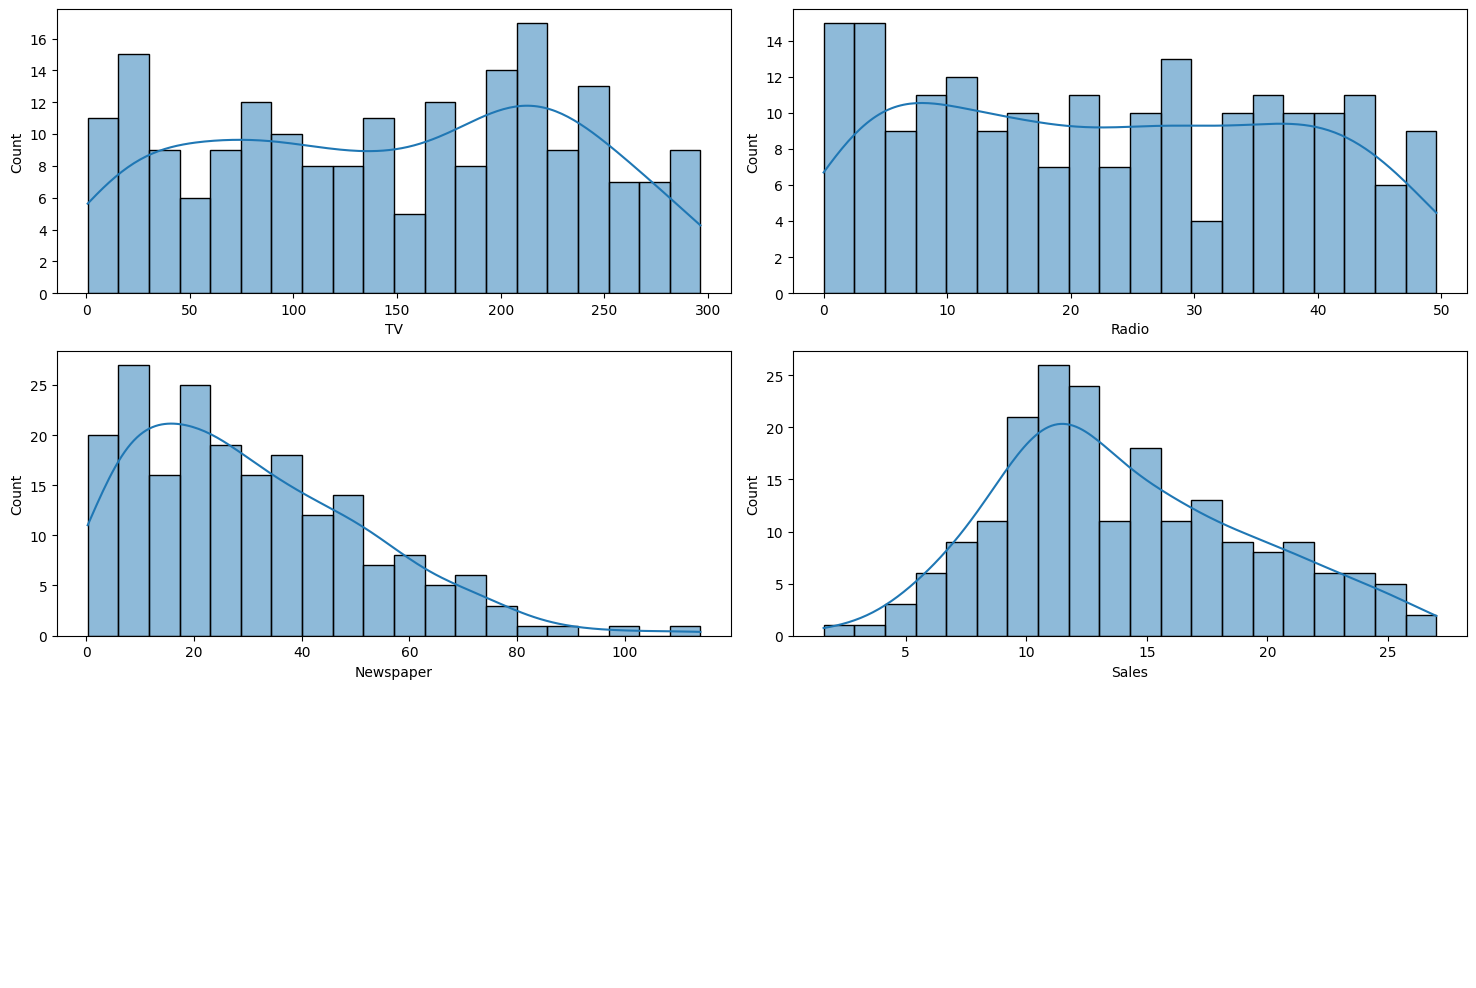

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))  
ax = ax.flatten()

features = df.columns

for i, column in enumerate(features):
    sns.histplot(data=df, x=column, kde=True, ax=ax[i],bins=20)
ax[4].axis('off')
ax[5].axis('off')
plt.tight_layout()# This helps in avoiding overlap of subplots
plt.show()

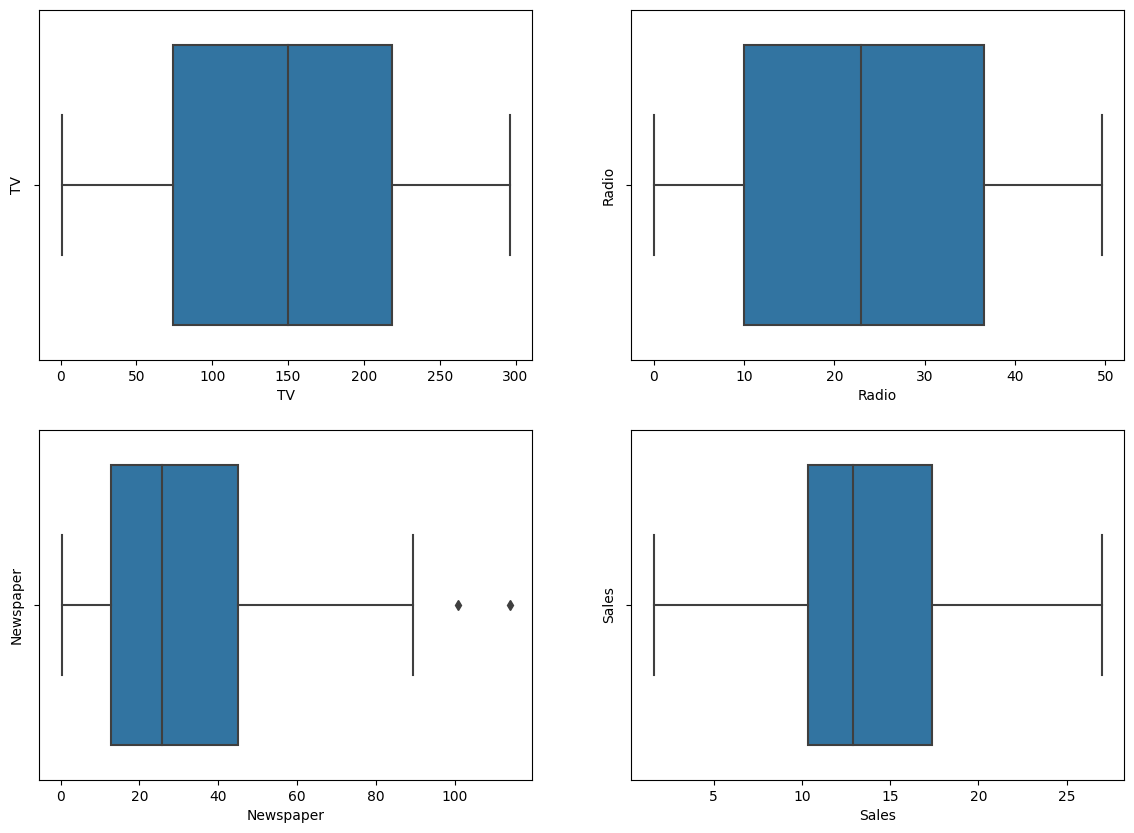

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))  #
ax = ax.flatten()
features = df.columns

for i, column in enumerate(features):
    sns.boxplot(data=df, x=column, ax=ax[i])
    ax[i].set_ylabel(column)  

# plt.tight_layout()
plt.show()

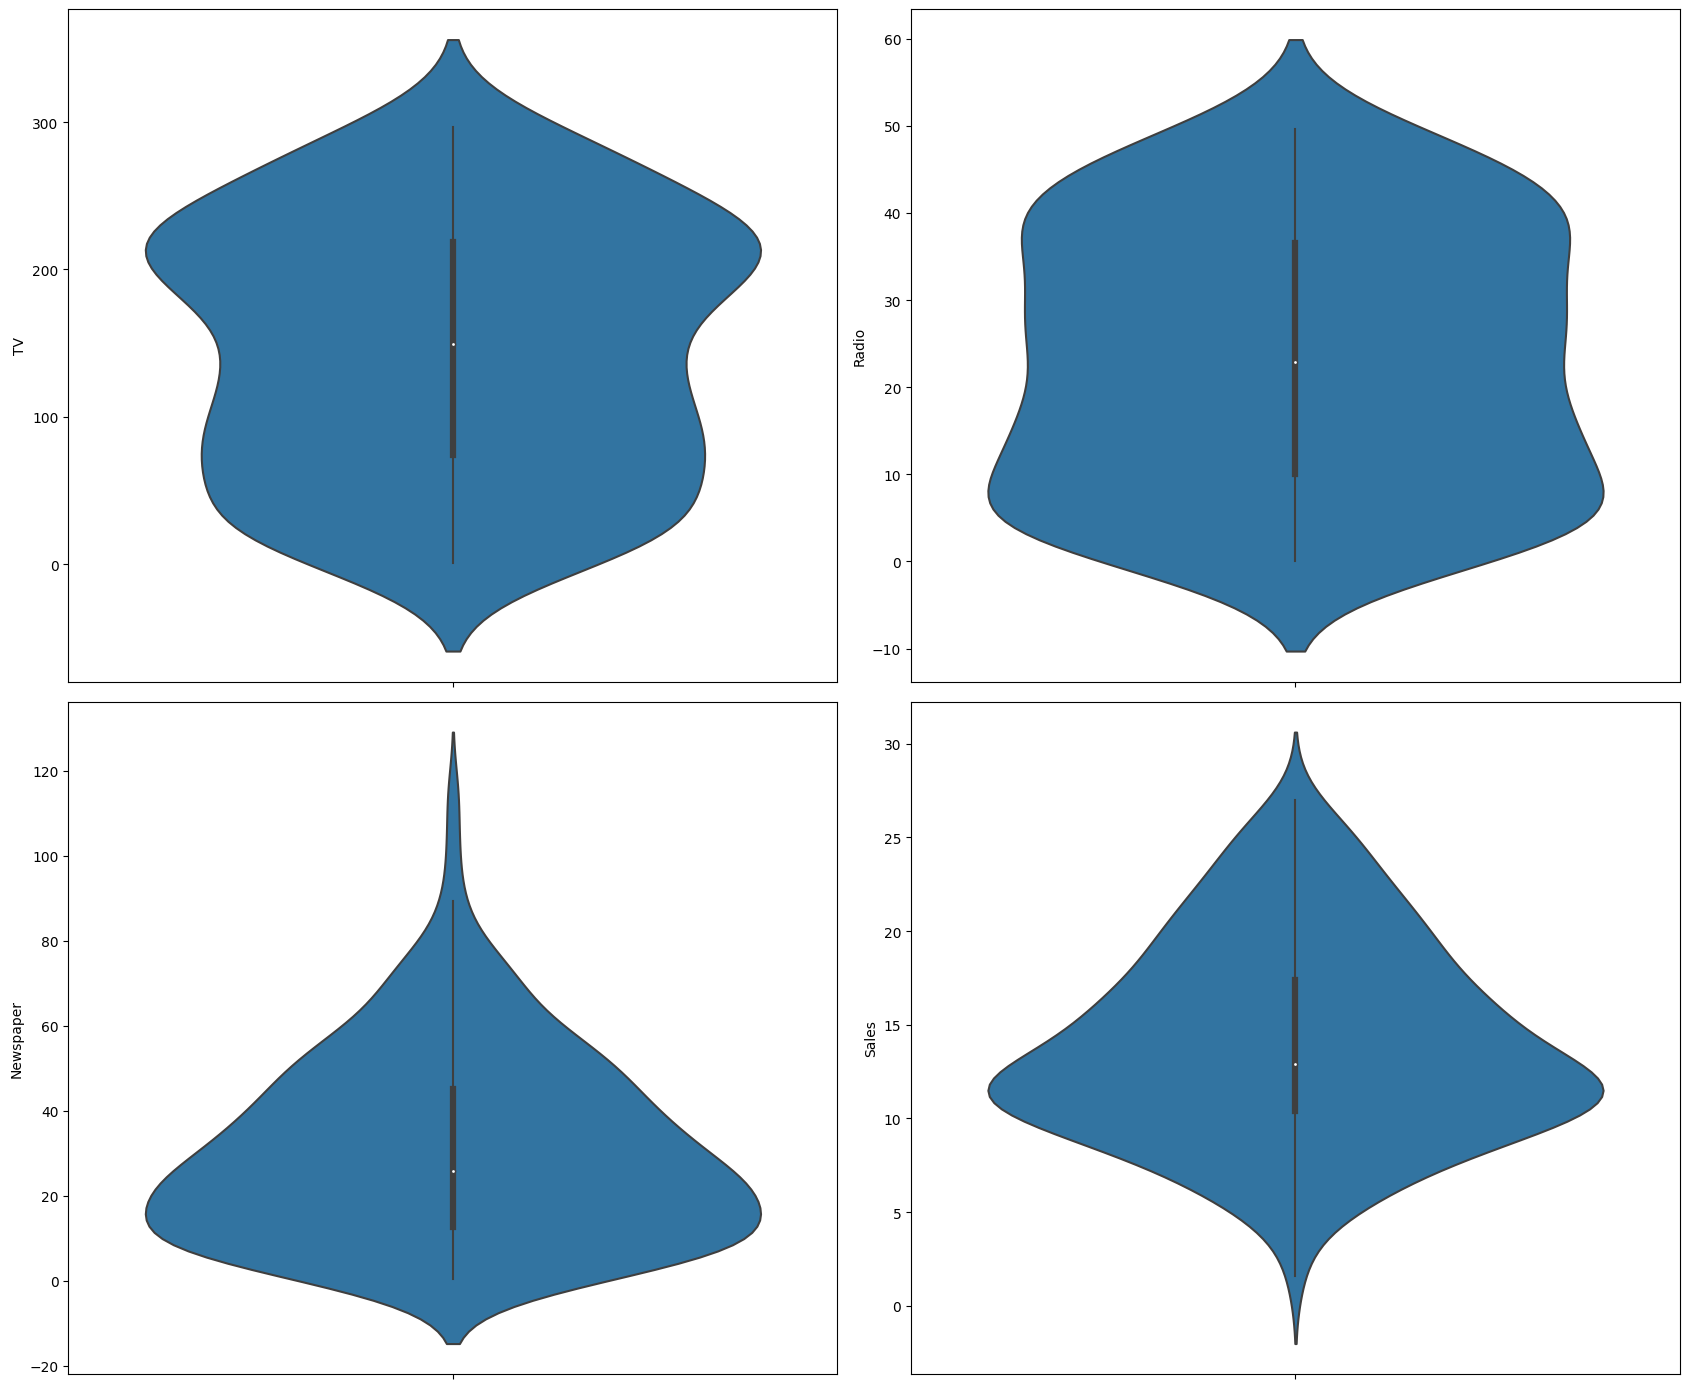

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(17, 14))  
ax = ax.flatten()

features = df.columns

for i, column in enumerate(features):
    sns.violinplot(data=df, y=column, ax=ax[i])
    ax[i].set_ylabel(column) 

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

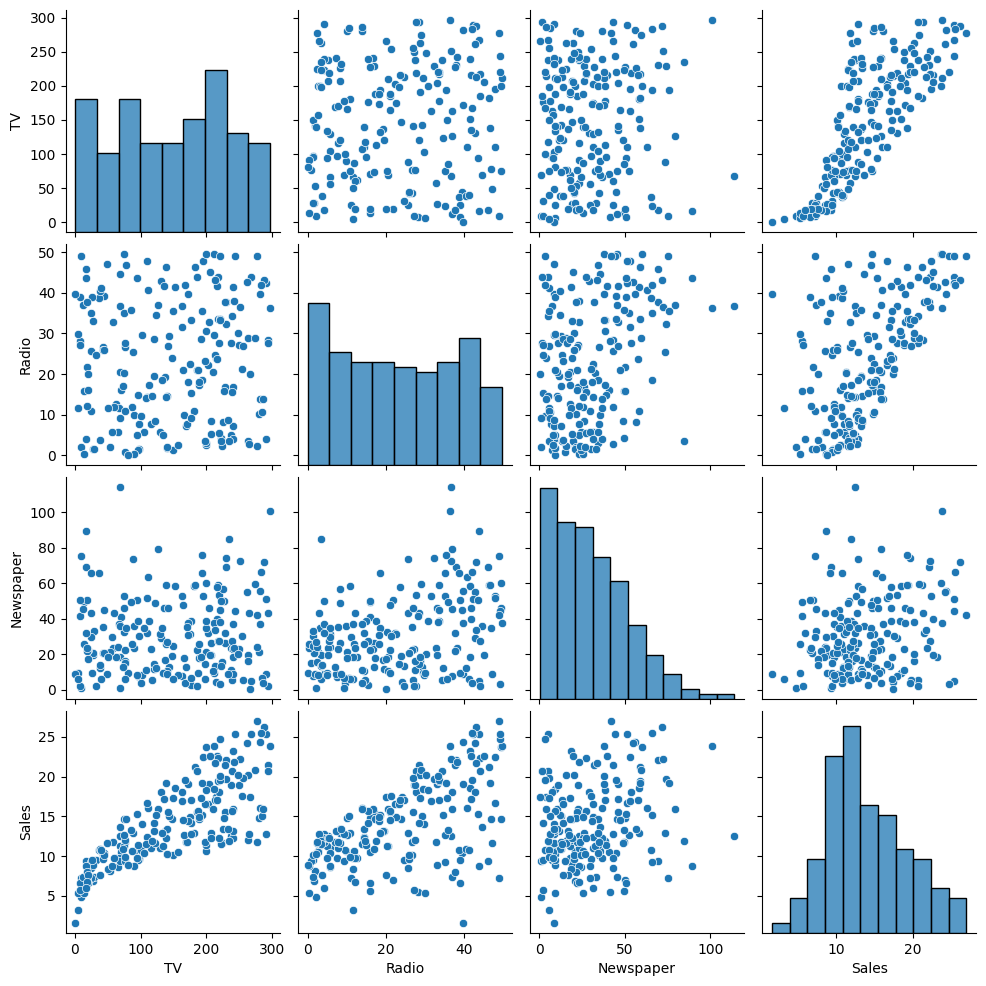

In [12]:
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

## <span style="color:#FF5733;">Evaluating the Relationships Between Dataset Columns for Correlation</span>


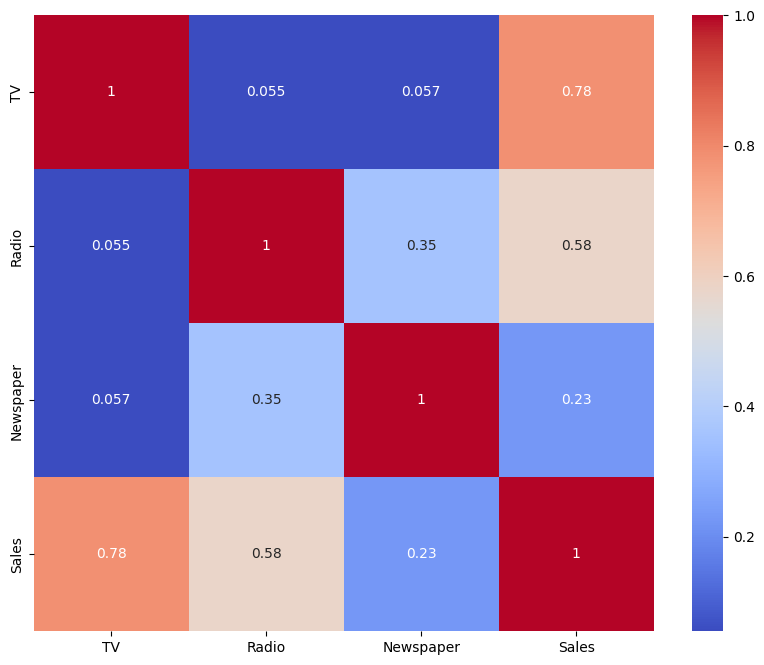

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [14]:
# Exclude the 'Sales' variable from the correlation matrix
correlation_matrix = df.drop('Sales', axis=1).corr(numeric_only=True)

correlation_threshold = 0.9

# Find highly correlated independent variables
correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_columns.add(correlation_matrix.columns[i])

correlated_columns

set()

## <span style="color:#FF5733;">Conducting Train-Test Split and Implementing Feature Scaling</span>


In [15]:

X=df.drop("Sales",axis=1)
y=df['Sales']

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

columns=['TV','Radio','Newspaper']
# Fit the scaler on the training data and transform the training data
X_train[columns]= scaler.fit_transform(X_train[columns])

# Transform the test data using the same scaler
X_test[columns] = scaler.transform(X_test[columns])


In [16]:
X_train.head()

,TV,Radio,Newspaper
79,-0.404248,-1.028237,-0.337675
197,0.320608,-0.919828,-1.161439
38,-1.270511,0.259124,0.254251
24,-1.042359,-0.696233,-0.574446
122,0.879103,-1.387343,-0.707629


In [17]:
X_test.head()

,TV,Radio,Newspaper
95,0.157812,0.591127,1.132275
15,0.539253,1.681996,1.132275
30,1.697834,0.367533,0.653801
158,-1.643633,0.950233,0.752455
128,0.835137,1.770079,-1.319286


## <span style="color:#FF5733;">Applying Linear Regression, and Evaluating Different Metrics</span>

In [18]:
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_lr.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Calculate other metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the metrics
print(f'R2 Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


R2 Score: 0.8994380241009119
Mean Squared Error (MSE): 3.174097353976106
Mean Absolute Error (MAE): 1.4607567168117603


## <span style="color:#FF5733;">Applying SVR , and Evaluating Different Metrics</span>


In [19]:
# Initialize the Support Vector Machine (SVM) regression model
model_svm = SVR(kernel='linear') 

# Fit the model to the training data
model_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = model_svm.predict(X_test)

# Calculate the R2 score
r2_svm = r2_score(y_test, y_pred_svm)

# Calculate other metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Print the metrics
print(f'SVM R2 Score: {r2_svm}')
print(f'SVM Mean Squared Error (MSE): {mse_svm}')
print(f'SVM Mean Absolute Error (MAE): {mae_svm}')


SVM R2 Score: 0.8838413959250325
SVM Mean Squared Error (MSE): 3.6663829895893683
SVM Mean Absolute Error (MAE): 1.4381564685912238


## <span style="color:#FF5733;">Choosing the Right K value for KNeighborsRegressor</span>


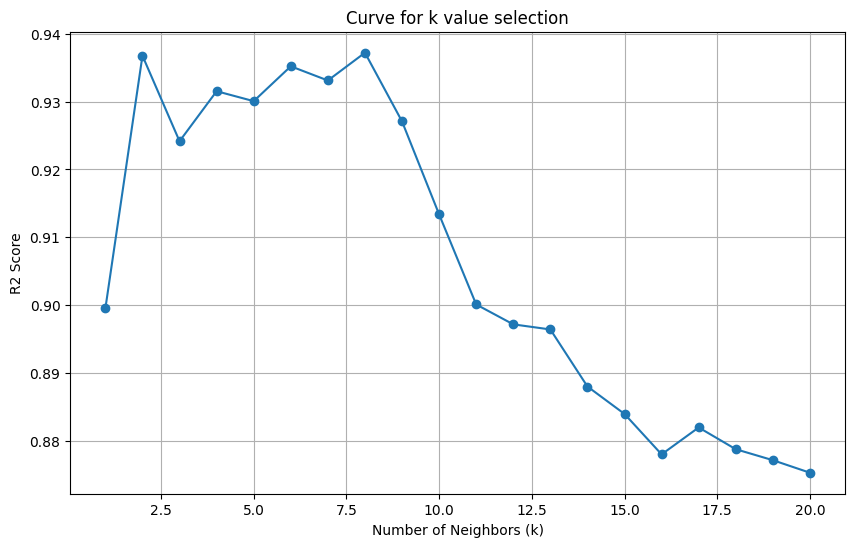

In [20]:

# Initialize a list to store the R2 scores for different values of k
r2_values = []

# Define a range of k values to test
k_values = range(1, 21)  # You can adjust the range as needed

for k in k_values:
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    r2 = r2_score(y_test, y_pred_knn)
    r2_values.append(r2)

# Plot the elbow curve for R2 scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_values, marker='o', linestyle='-')
plt.title('Curve for k value selection')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()


## <span style="color:#FF5733;">Applying KNeighborsRegressor, and Evaluating Different Metrics</span>


In [21]:

k = 8 
model_knn = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
model_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Calculate the R2 score
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate other metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Print the metrics
print(f'k-NN R2 Score: {r2_knn}')
print(f'k-NN Mean Squared Error (MSE): {mse_knn}')
print(f'k-NN Mean Absolute Error (MAE): {mae_knn}')


k-NN R2 Score: 0.9372013098555991
k-NN Mean Squared Error (MSE): 1.9821523437499995
k-NN Mean Absolute Error (MAE): 0.9678125


## <span style="color:#FF5733;">Applying DecisionTreeRegressor, and Evaluating Different Metrics</span>


In [22]:
# Initialize the Decision Tree regression model

model_dt = DecisionTreeRegressor(random_state=42)  

# Fit the model to the training data
model_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)

# Calculate the R2 score

r2_dt = r2_score(y_test, y_pred_dt)

# Calculate other metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print the metrics
print(f'Decision Tree R2 Score: {r2_dt}')
print(f'Decision Tree Mean Squared Error (MSE): {mse_dt}')
print(f'Decision Tree Mean Absolute Error (MAE): {mae_dt}')


Decision Tree R2 Score: 0.9310914968293178
Decision Tree Mean Squared Error (MSE): 2.175
Decision Tree Mean Absolute Error (MAE): 0.9850000000000001


## <span style="color:#FF5733;">Applying RandomForestRegressor, and Evaluating Different Metrics</span>


In [23]:
# Initialize the Random Forest regression model

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters like n_estimators if needed

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate the R2 score

r2_rf = r2_score(y_test, y_pred_rf)

# Calculate other metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate the number of features used in the model
num_features = X_test.shape[1]

# Calculate the adjusted R-squared score
adjusted_r2_rf = 1 - ((1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the metrics
print(f'Random Forest R2 Score: {r2_rf}')
print(f'Random Forest Adjusted R-squared: {adjusted_r2_rf}')
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest Mean Absolute Error (MAE): {mae_rf}')



Random Forest R2 Score: 0.9812750924472915
Random Forest Adjusted R-squared: 0.9797146834845658
Random Forest Mean Squared Error (MSE): 0.5910253749999989
Random Forest Mean Absolute Error (MAE): 0.6207249999999989


## <span style="color:#FF5733;">Regression plot between actual and predicted values</span>


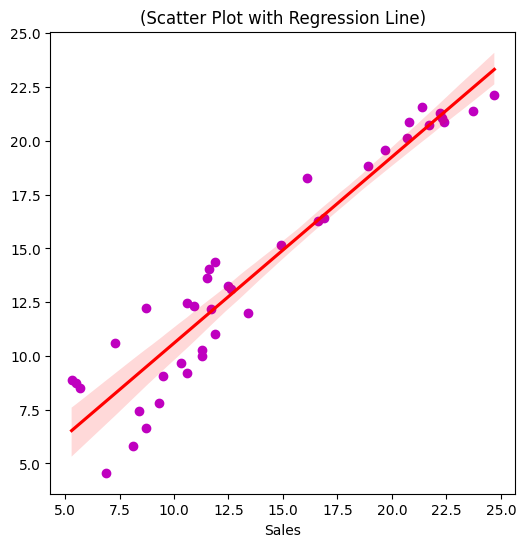

In [24]:
# Create a scatter plot of true vs. predicted values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='m')

# Add a regression line using Seaborn's regplot
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.title('(Scatter Plot with Regression Line)')

# Show the plot
plt.show()

## <span style="color:#FF5733;">Plot between actual and predicted values</span>


In [25]:
def plot_dis(y_test, y_pred):
    plt.figure()
    sns.kdeplot(y_test, color="r", label="Actual Value")
    sns.kdeplot(y_pred, color="b", label="Pred Values")
    plt.legend()

    plt.title('Actual vs Pred Values')

    plt.show()

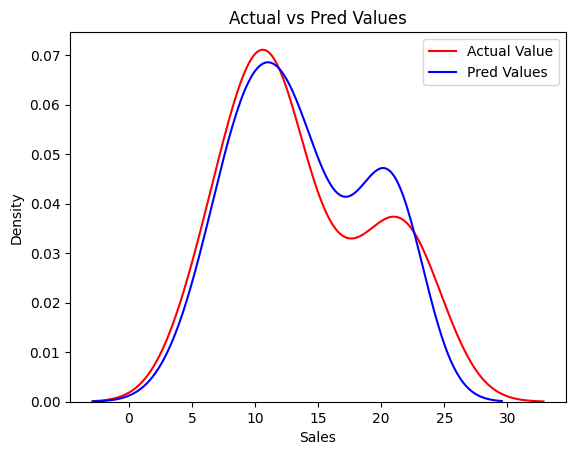

In [26]:
plot_dis(y_test, y_pred)


## <span style="color:black;">...............................Thank You !! .........................</span>
